##### Week 5:
Building a Classifier
- Overview of Machine Learning
- Feature Engineering
- One hot encoding to encode categorical variables for use in a model
- Creating training and test data

Coding tasks:
The file brfss.csv contains a subset of the responses and variables from the [2019 Behavioral Risk Factor Surveillance System (BRFSS)](https://www.cdc.gov/brfss/). This dataset can be downloaded using this link: [https://drive.google.com/file/d/1acJKmT2aFf2nZl_VYLE897yx0LPNajoY/view?usp=sharing](https://drive.google.com/file/d/1acJKmT2aFf2nZl_VYLE897yx0LPNajoY/view?usp=sharing).

A detailed Codebook can be found [here](https://www.cdc.gov/brfss/annual_data/2019/pdf/codebook19_llcp-v2-508.HTML).

Our target variable is the CHECKUP1 column, which contains the responses to the question "About how long has it been since you last visited a doctor for a routine checkup?   [A routine checkup is a general physical exam, not an exam for a specific injury, illness, or condition.]" Specifically, we want to try and predict if someone gives an answer besides "Within past year (anytime less than 12 months ago)".

First, create a new coumn, "target" by converting this to a binary outcome. After you do this, drop the CHECKUP1 column from your dataframe so that you don't accidentally make predictions based off of it.

Then, experiment with making a logistic regression model to predict the target variable using one or more of the other columns. Note that you will need to convert the precictor columns into dummy variable prior to fitting a model. What do you find?

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

brfss = pd.read_csv('../data/brfss.csv')
brfss.head()

,GENHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,_RFHYPE5,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,...,EXERANY2,_METSTAT,_URBSTAT,_IMPRACE,_RFBMI5,_RFSMOK3,_RFBING5,_RFDRHV7,_TOTINDA,target
0,Good,Yes,"Yes, only one",No,Within past year (anytime less than 12 months ...,Yes,Yes,No,No,No,...,No,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","Black, Non-Hispanic",Yes,No,No,No,No physical activity or exercise in last 30 days,True
1,Fair,Yes,"Yes, only one",No,Within past year (anytime less than 12 months ...,No,No,No,No,No,...,Yes,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","White, Non-Hispanic",No,No,No,No,Had physical activity or exercise,True
2,Good,Yes,More than one,No,Within past year (anytime less than 12 months ...,Yes,No,No,No,No,...,Yes,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","Black, Non-Hispanic",Yes,No,No,No,Had physical activity or exercise,True
3,Very good,Yes,"Yes, only one",No,Within past year (anytime less than 12 months ...,No,No,No,No,No,...,Yes,"Nonmetropolitan counties (_URBNRRL = 5,6)",Rural counties (_URBNRRL = 6),"White, Non-Hispanic",Yes,Yes,No,No,Had physical activity or exercise,True
4,Poor,Yes,"Yes, only one",No,Within past year (anytime less than 12 months ...,No,Yes,No,No,No,...,No,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","White, Non-Hispanic",No,No,No,No,No physical activity or exercise in last 30 days,True


In [162]:
brfss.loc[(brfss['CHECKUP1'] == 'Within past year (anytime less than 12 months ago)', 'target')] = 1
brfss.loc[(brfss['CHECKUP1'] != 'Within past year (anytime less than 12 months ago)', 'target')] = 0
brfss = brfss.drop(columns = ['CHECKUP1', 'GENHLTH', 'MARITAL', 'EDUCA', 'RENTHOM1', 'INCOME2', 'DEAF', 'BLIND', 'DECIDE',
                  'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'EXERANY2', '_METSTAT', '_URBSTAT'])

In [163]:
#categorical_variables = ['GENHLTH', 'HLTHPLN1', 'MEDCOST', '_RFHYPE5']
#brfss = pd.get_dummies(brfss, columns = categorical_variables)
brfss = pd.get_dummies(brfss)
brfss

,HLTHPLN1_No,HLTHPLN1_Yes,PERSDOC2_More than one,PERSDOC2_No,"PERSDOC2_Yes, only one",MEDCOST_No,MEDCOST_Yes,_RFHYPE5_No,_RFHYPE5_Yes,TOLDHI2_No,...,_RFSMOK3_No,_RFSMOK3_Yes,_RFBING5_No,_RFBING5_Yes,_RFDRHV7_No,_RFDRHV7_Yes,_TOTINDA_Had physical activity or exercise,_TOTINDA_No physical activity or exercise in last 30 days,target_0,target_1
0,0,1,0,0,1,1,0,0,1,0,...,1,0,1,0,1,0,0,1,0,1
1,0,1,0,0,1,1,0,1,0,1,...,1,0,1,0,1,0,1,0,0,1
2,0,1,1,0,0,1,0,0,1,1,...,1,0,1,0,1,0,1,0,0,1
3,0,1,0,0,1,1,0,1,0,1,...,0,1,1,0,1,0,1,0,0,1
4,0,1,0,0,1,1,0,1,0,0,...,1,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262044,0,1,0,0,1,1,0,1,0,1,...,1,0,1,0,1,0,0,1,0,1
262045,0,1,0,0,1,1,0,0,1,1,...,1,0,1,0,1,0,1,0,0,1
262046,1,0,0,0,1,0,1,1,0,1,...,0,1,1,0,1,0,1,0,0,1
262047,0,1,0,0,1,1,0,1,0,1,...,0,1,1,0,1,0,1,0,0,1


In [164]:
X = brfss.drop(columns = ['target_0','target_1'])
y = brfss['target_1']

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,     # Keep the same proportions of the target in the training and test data
                                                    test_size = 0.25,
                                                    random_state = 321)

In [166]:
from sklearn.linear_model import LogisticRegression

In [167]:
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [168]:
coefficients = pd.DataFrame({
    'variable': X.columns,
    'coefficient': logreg.coef_[0]
})

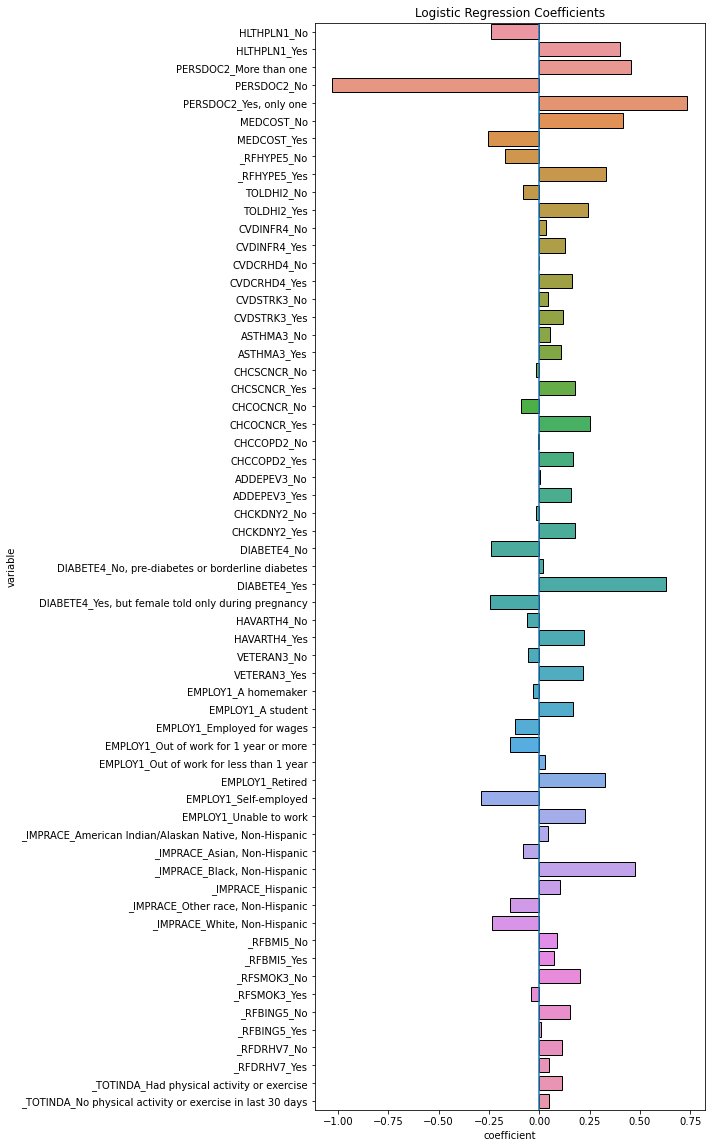

In [169]:
fig, ax = plt.subplots(figsize = (7,20))
sns.barplot(data = coefficients,
            x = 'coefficient', 
            y = 'variable', 
            ax = ax, 
            edgecolor = 'black')
plt.title('Logistic Regression Coefficients')
ymin, ymax = plt.ylim()
plt.vlines(x = 0, ymin = ymin, ymax = ymax);

In [170]:
y_pred_prob_all = logreg.predict_proba(X_test)[:,1]

In [171]:
from sklearn.metrics import roc_auc_score, roc_curve

C:\Users\jenni\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


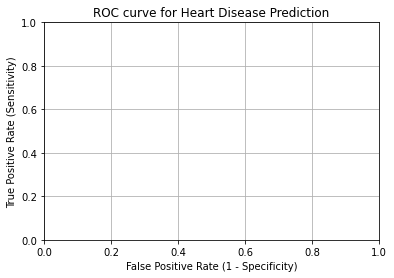

In [172]:
fp_rate, tp_rate, thresholds = roc_curve(y_test == 'Yes', y_pred_prob_all)

plt.plot(fp_rate, tp_rate)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart Disease Prediction')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [173]:
roc_auc_score(y_test, y_pred_prob_all)

0.797601914432873

##### Week 6:
More machine learning
    - Tree-based models
    - Regularization
 
 Coding task:

 Try using regularization or a tree-based model to improve your model's performance on the BRFSS dataset.


In [177]:
from sklearn.tree import DecisionTreeClassifier
from cm import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 1000, max_depth = 5, min_samples_leaf = 5, random_state = 321)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=1000,
                       random_state=321)

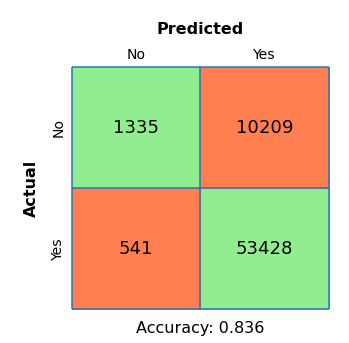

In [178]:
y_pred = forest.predict(X_test)
plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'], metric = 'accuracy')

In [180]:
roc_auc_score(y_test, forest.predict_proba(X_test)[:,1])

0.7937793098209263

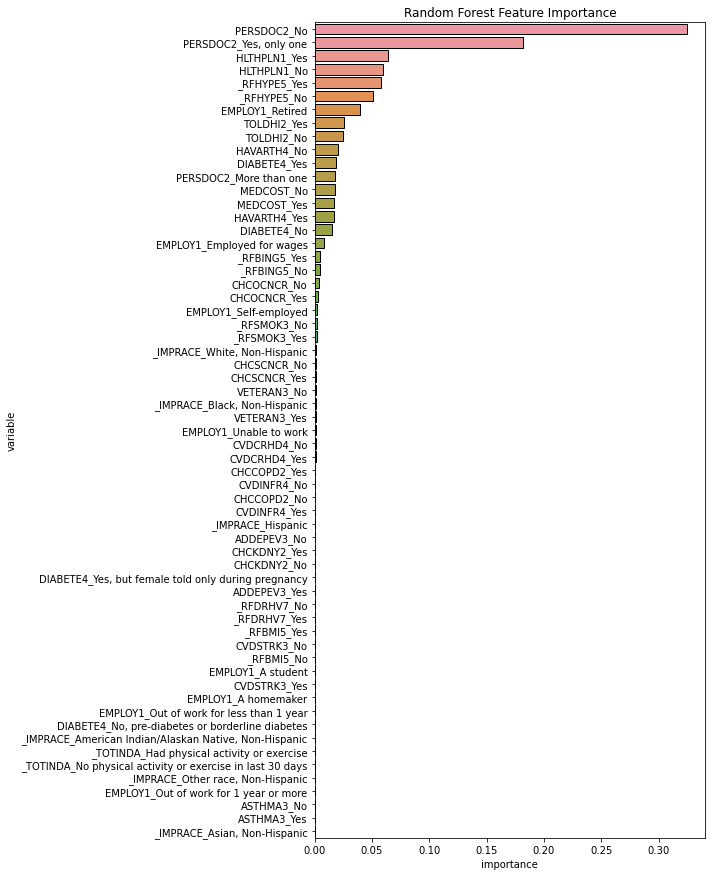

In [182]:
importances = pd.DataFrame({'variable': X.columns,
                           'importance': forest.feature_importances_}).sort_values('importance', ascending = False)


fig, ax = plt.subplots(figsize = (7,15))
sns.barplot(data = importances,
            x = 'importance', y = 'variable', ax = ax, edgecolor = 'black')
plt.title('Random Forest Feature Importance');

In [183]:
from sklearn.preprocessing import StandardScaler

In [184]:
scaler = StandardScaler().fit(X_train)

In [185]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [186]:
logreg = LogisticRegression(max_iter=10000,
                            penalty = 'l1',             # LASSO penalty
                            C = 0.05,                   # Lower C = stronger penalty
                           solver = 'saga')
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=0.05, max_iter=10000, penalty='l1', solver='saga')

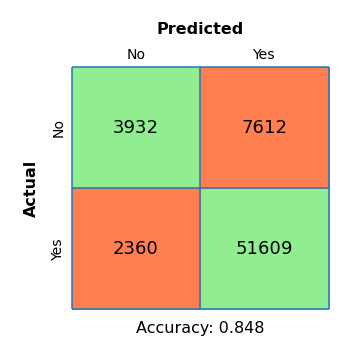

In [187]:
y_pred = logreg.predict(X_test_scaled)

plot_confusion_matrix(y_test, y_pred, labels = ['No', 'Yes'], metric = 'accuracy')

In [188]:
roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:,1])

0.7976434894665729

In [189]:
coefficients = pd.DataFrame({
    'variable': X.columns,
    'coefficient': logreg.coef_[0]
})

In [190]:
coefficients[coefficients['coefficient'] != 0]

,variable,coefficient
0,HLTHPLN1_No,-0.079857
1,HLTHPLN1_Yes,0.079857
3,PERSDOC2_No,-0.517359
4,"PERSDOC2_Yes, only one",0.115917
5,MEDCOST_No,0.097230
6,MEDCOST_Yes,-0.097230
7,_RFHYPE5_No,-0.124112
8,_RFHYPE5_Yes,0.124112
9,TOLDHI2_No,-0.078467
10,TOLDHI2_Yes,0.078467
